# Valores NASA

## Temperatura Máxima

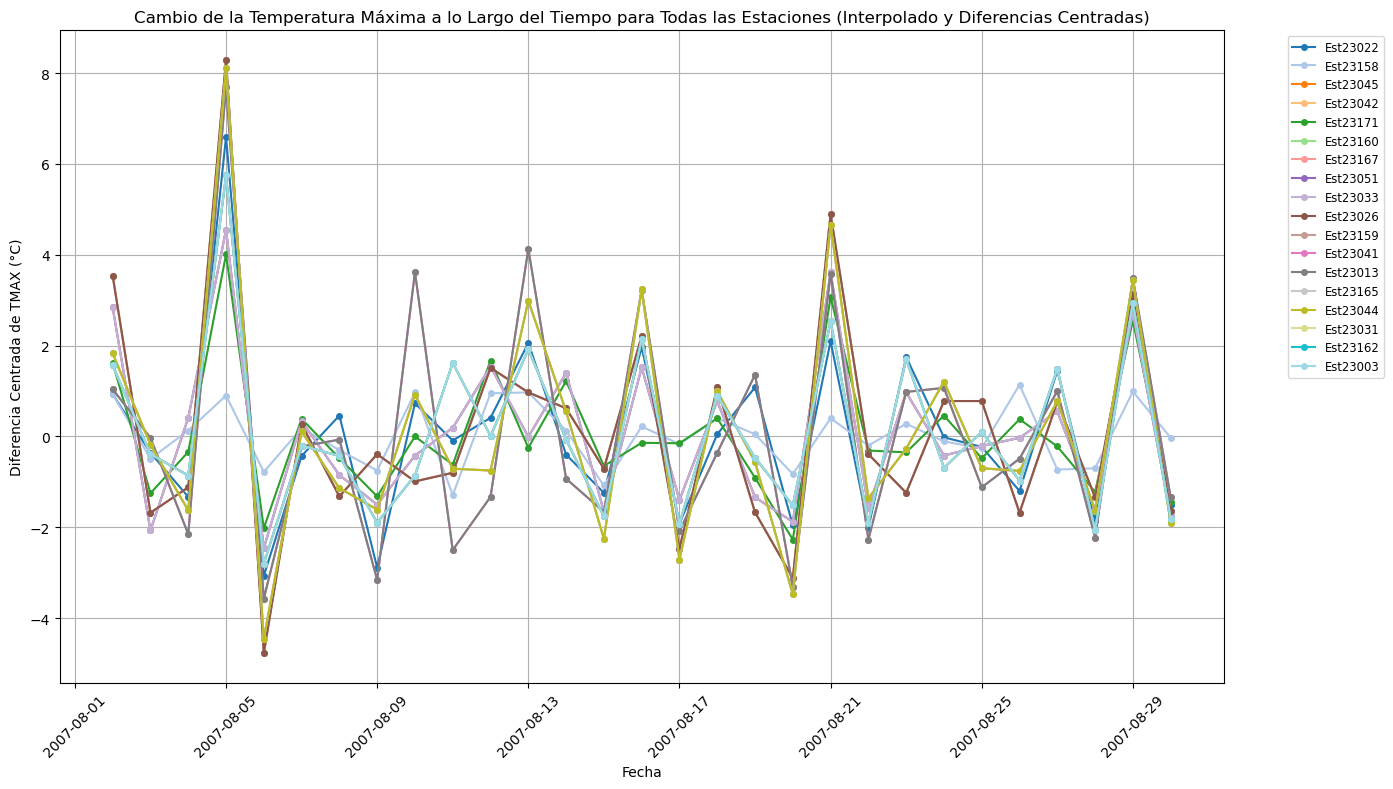

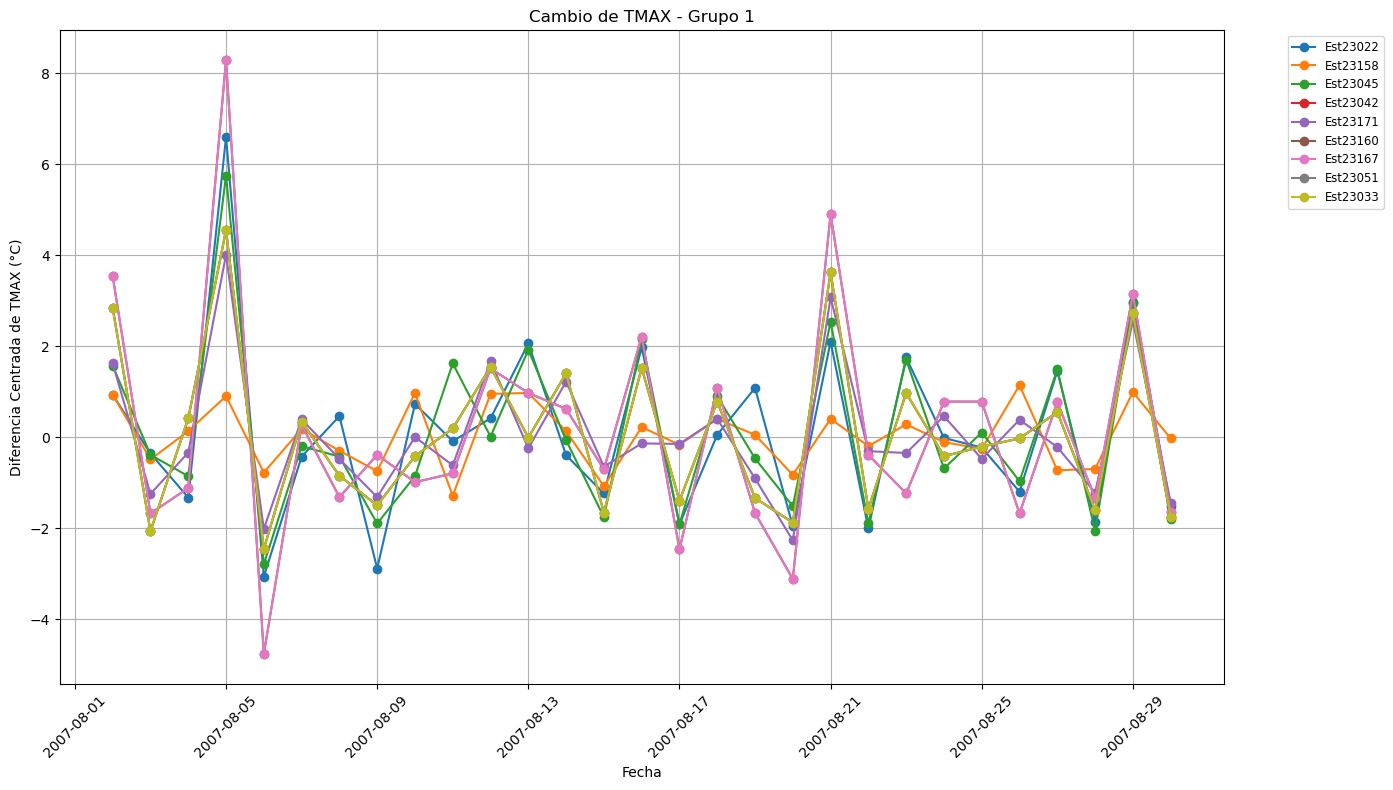

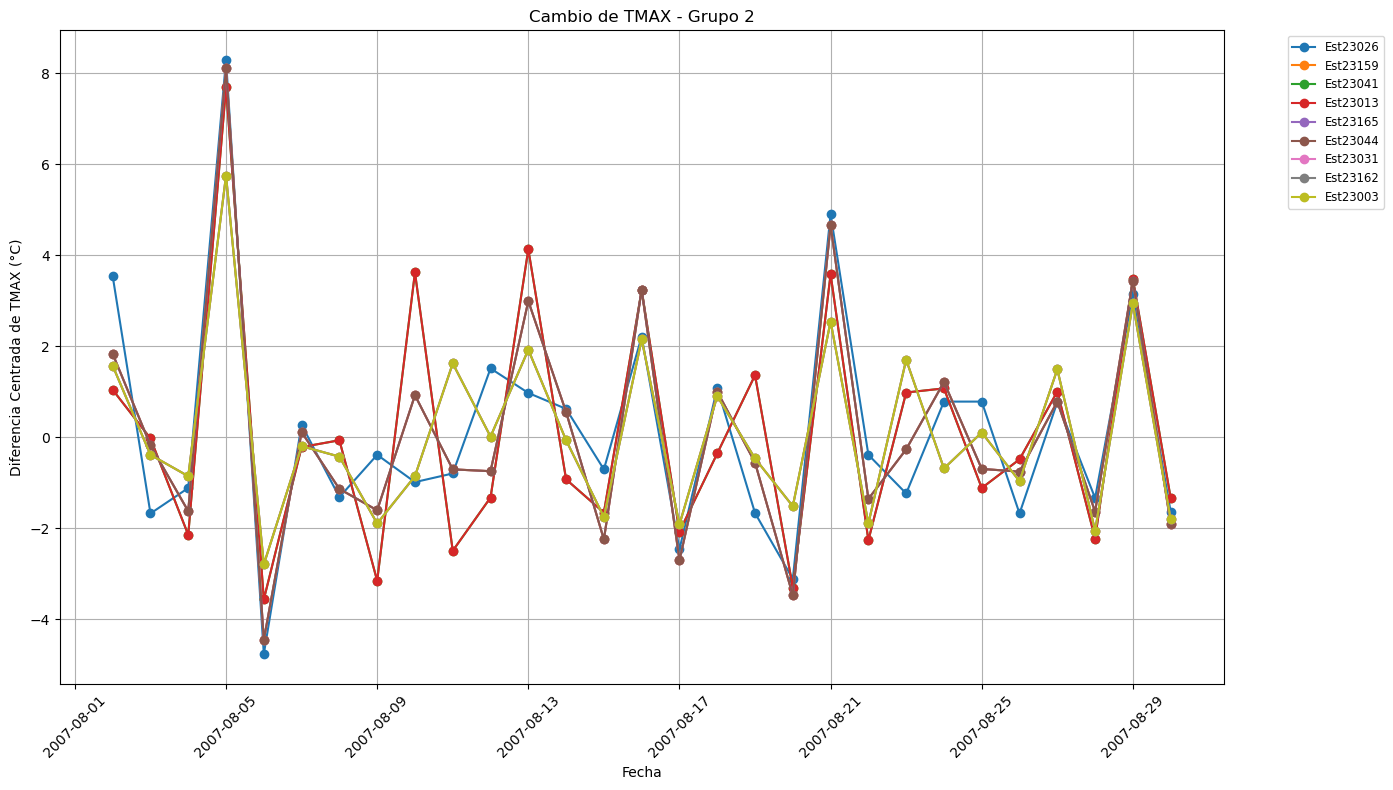

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}

df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
    df['Estacion'] = estacion  # Añadir identificador de estación
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Asegurarse de que los datos estén ordenados por fecha y estación
df_combinado.sort_values(by=['Fecha', 'Estacion'], inplace=True)

# Interpolar valores NaN en TMAX para cada estación
df_combinado['TMAX'] = df_combinado.groupby('Estacion')['TMAX'].transform(lambda x: x.interpolate())

# Calcular diferencias finitas centradas para TMAX a lo largo del tiempo para cada estación
df_combinado['DTMAX_Centrada'] = df_combinado.groupby('Estacion')['TMAX'].transform(lambda x: x.diff().shift(-1) - x.diff())

# Visualización de la diferencia centrada de TMAX a lo largo del tiempo para todas las estaciones
plt.figure(figsize=(14, 8))

# Generar colores únicos para cada estación
colores = plt.cm.tab20(np.linspace(0, 1, len(estaciones_info)))

for i, (estacion, info) in enumerate(estaciones_info.items()):
    df_estacion = df_combinado[df_combinado['Estacion'] == estacion]
    plt.plot(df_estacion['Fecha'], df_estacion['DTMAX_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4, color=colores[i])

plt.title('Cambio de la Temperatura Máxima a lo Largo del Tiempo para Todas las Estaciones (Interpolado y Diferencias Centradas)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Centrada de TMAX (°C)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()




# Define una lista de colores. Asegúrate de tener al menos tantos colores como estaciones.
colores_estaciones = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#1a55FF", "#FF5733", "#DAF7A6", "#581845", "#900C3F",
    "#C70039", "#FFC300", "#8e44ad", "#3498db"
]

# Asegura que la lista de colores tenga al menos tantos elementos como estaciones.
if len(colores_estaciones) < len(estaciones_info):
    print("Advertencia: No hay suficientes colores definidos para todas las estaciones.")

# Función para graficar un grupo de estaciones con colores únicos
def graficar_grupo_estaciones(estaciones, df, titulo):
    plt.figure(figsize=(14, 8))
    for i, estacion in enumerate(estaciones):
        df_estacion = df[df['Estacion'] == estacion]
        # Usa el color correspondiente de la lista para cada estación
        color = colores_estaciones[i % len(colores_estaciones)]
        plt.plot(df_estacion['Fecha'], df_estacion['DTMAX_Centrada'], label=estacion, marker='o', linestyle='-', color=color)
    
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia Centrada de TMAX (°C)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Dividir las estaciones en dos grupos y graficar
estaciones_lista = list(estaciones_info.keys())
mitad = len(estaciones_lista) // 2
estaciones_grupo_1 = estaciones_lista[:mitad]
estaciones_grupo_2 = estaciones_lista[mitad:]

# Asegúrate de que df_combinado esté preparado como se muestra en el código anterior

# Graficar los dos grupos de estaciones con colores únicos
graficar_grupo_estaciones(estaciones_grupo_1, df_combinado, 'Cambio de TMAX - Grupo 1')
graficar_grupo_estaciones(estaciones_grupo_2, df_combinado, 'Cambio de TMAX - Grupo 2')



## Temperatura Minima

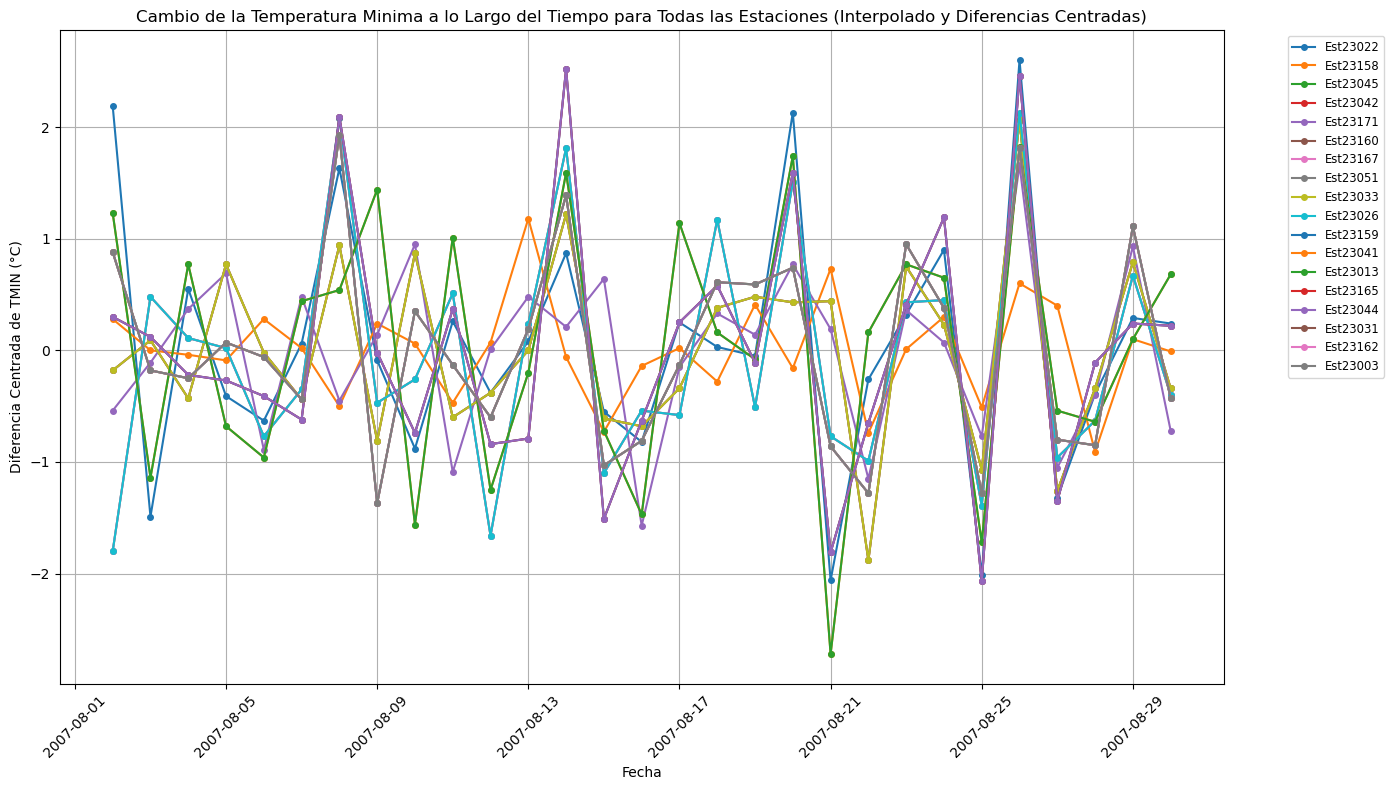

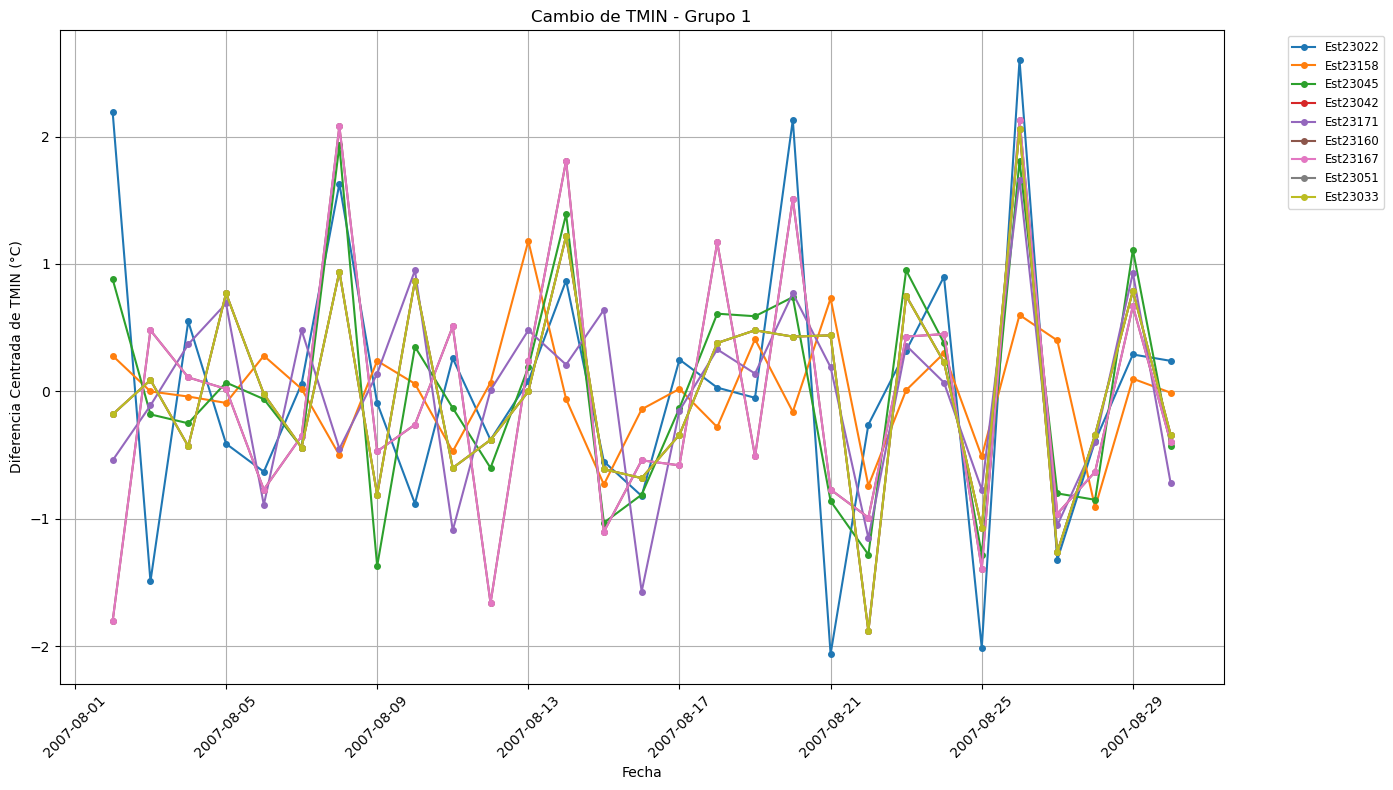

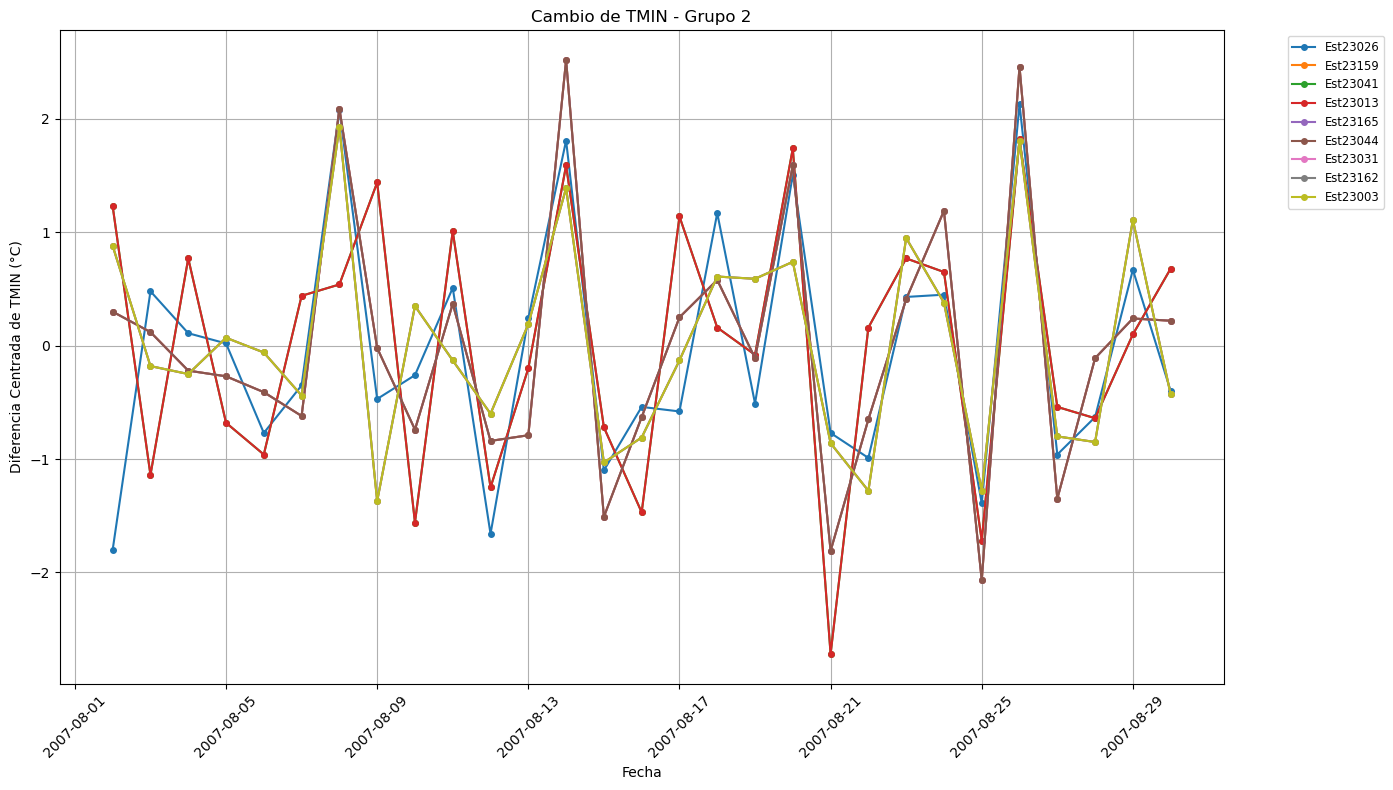

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}


# Cargar y combinar datos de todas las estaciones
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')
    df['Estacion'] = estacion  # Añadir identificador de estación
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Asegurarse de que los datos estén ordenados por fecha y estación
df_combinado.sort_values(by=['Fecha', 'Estacion'], inplace=True)

# Interpolar valores NaN en TMIN para cada estación
df_combinado['TMIN'] = df_combinado.groupby('Estacion')['TMIN'].transform(lambda x: x.interpolate())

# Ahora, calcular diferencias finitas centradas para TMIN a lo largo del tiempo para cada estación
df_combinado['DTMIN_Centrada'] = df_combinado.groupby('Estacion')['TMIN'].transform(lambda x: x.diff().shift(-1) - x.diff())

# Visualización de la diferencia centrada de TMIN a lo largo del tiempo para todas las estaciones
plt.figure(figsize=(14, 8))

for estacion in estaciones_info.keys():
    df_estacion = df_combinado[df_combinado['Estacion'] == estacion]
    plt.plot(df_estacion['Fecha'], df_estacion['DTMIN_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4)

plt.title('Cambio de la Temperatura Minima a lo Largo del Tiempo para Todas las Estaciones (Interpolado y Diferencias Centradas)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Centrada de TMIN (°C)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dividir las estaciones en dos grupos
estaciones_lista = list(estaciones_info.keys())
mitad = len(estaciones_lista) // 2  # Encuentra el punto medio de la lista
estaciones_grupo_1 = estaciones_lista[:mitad]
estaciones_grupo_2 = estaciones_lista[mitad:]

# Función para graficar un grupo de estaciones
def graficar_grupo_estaciones(estaciones, df, titulo):
    plt.figure(figsize=(14, 8))
    for estacion in estaciones:
        df_estacion = df[df['Estacion'] == estacion]
        plt.plot(df_estacion['Fecha'], df_estacion['DTMIN_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4)
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia Centrada de TMIN (°C)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar los dos grupos de estaciones
graficar_grupo_estaciones(estaciones_grupo_1, df_combinado, 'Cambio de TMIN - Grupo 1')
graficar_grupo_estaciones(estaciones_grupo_2, df_combinado, 'Cambio de TMIN - Grupo 2')


## Precipitación

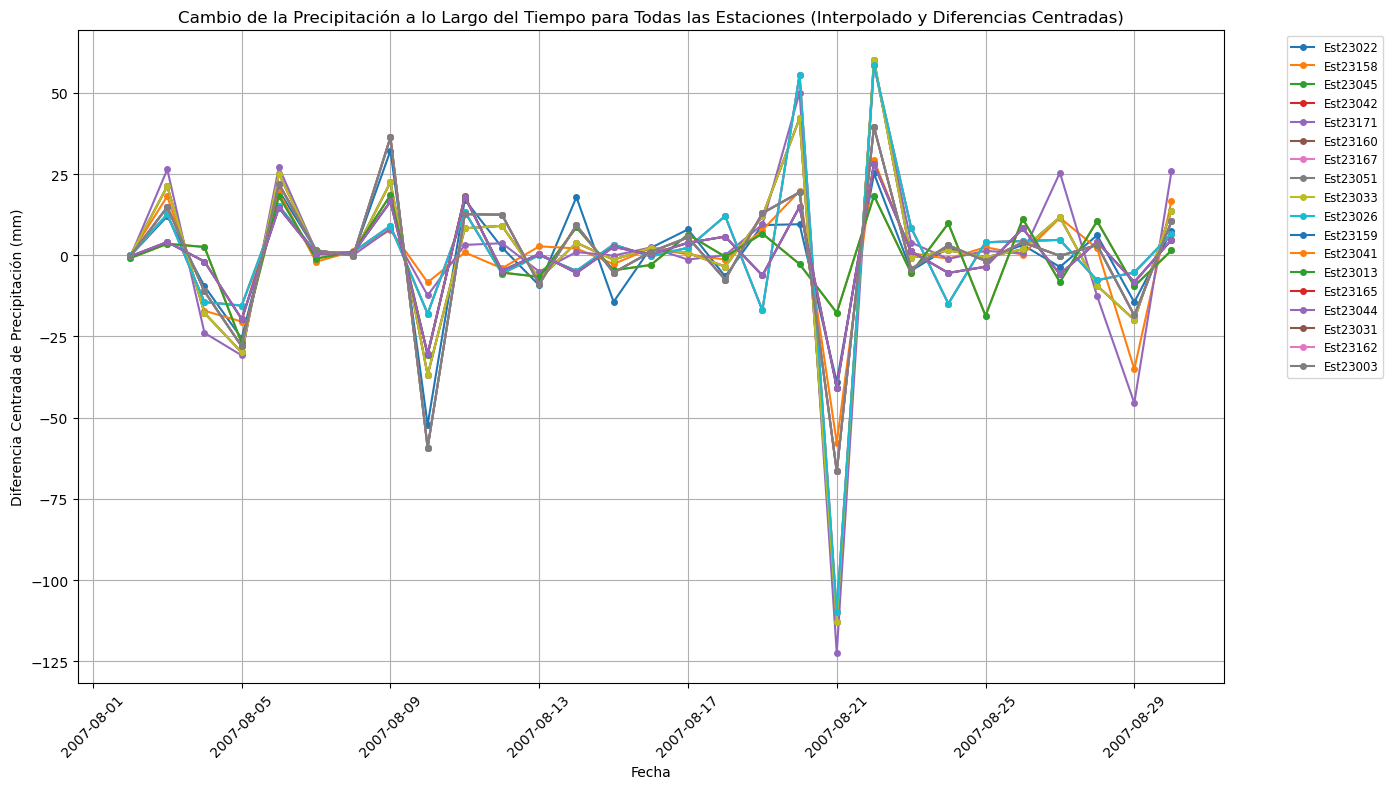

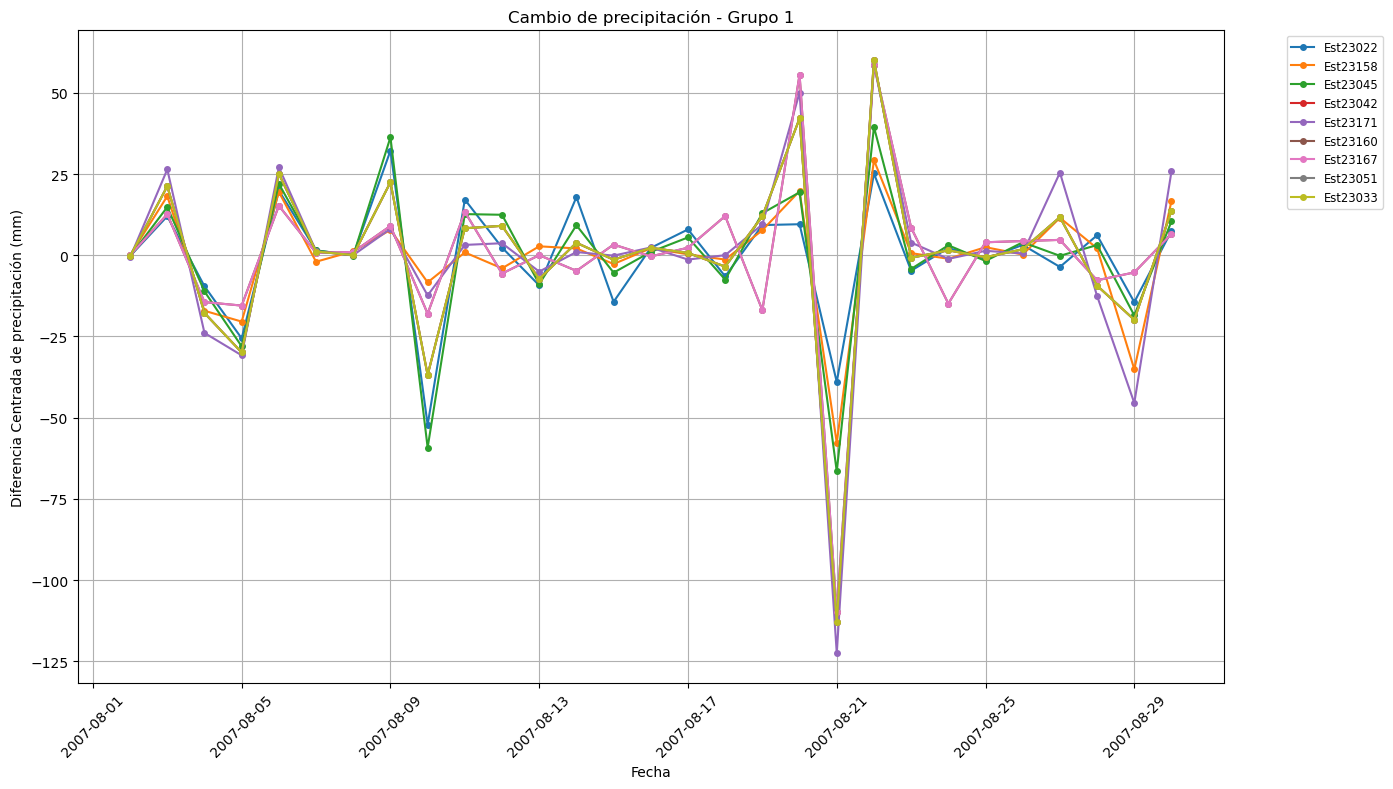

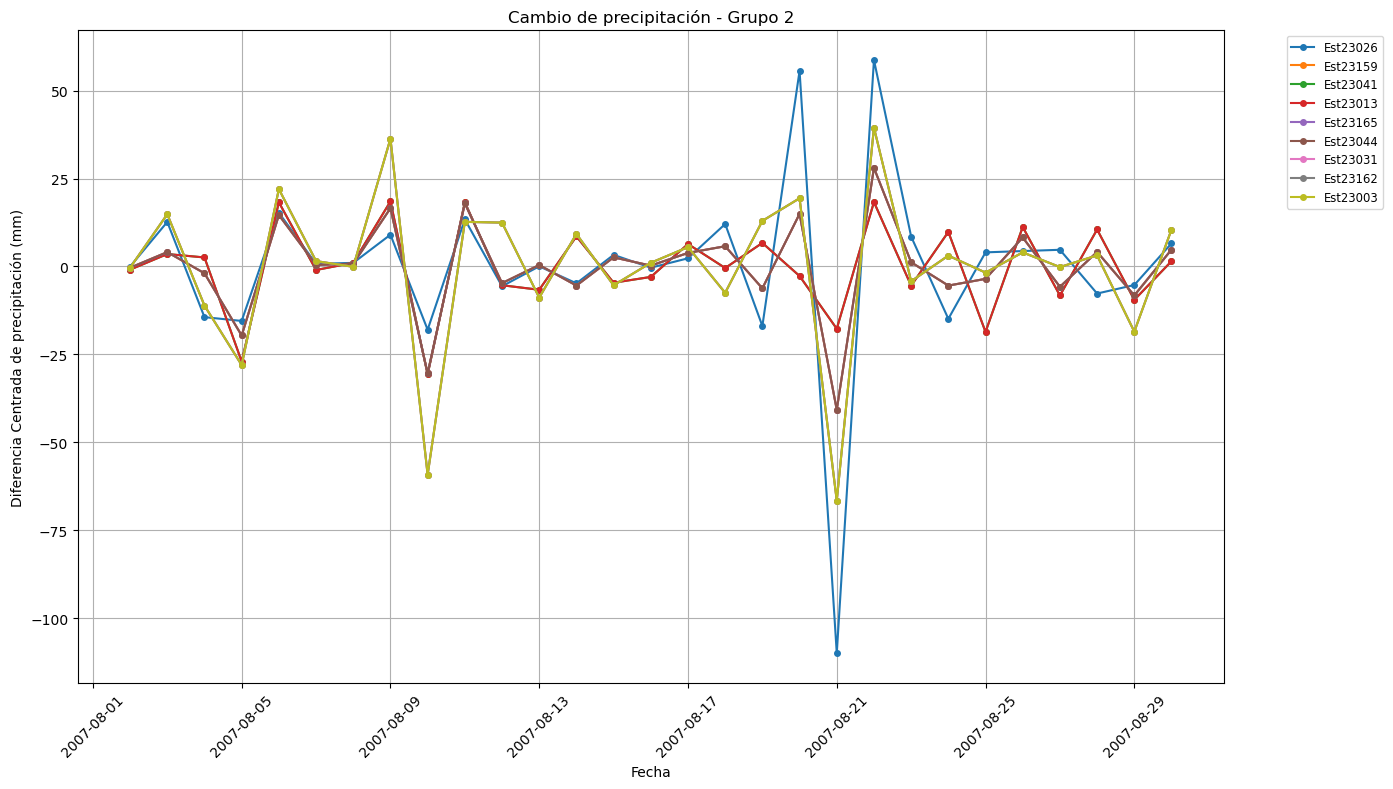

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}


# Cargar y combinar datos de todas las estaciones
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['PRECIP'] = pd.to_numeric(df['PRECIP'], errors='coerce')
    df['Estacion'] = estacion  # Añadir identificador de estación
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Asegurarse de que los datos estén ordenados por fecha y estación
df_combinado.sort_values(by=['Fecha', 'Estacion'], inplace=True)

# Interpolar valores NaN en PRECIP para cada estación
df_combinado['PRECIP'] = df_combinado.groupby('Estacion')['PRECIP'].transform(lambda x: x.interpolate())

# Ahora, calcular diferencias finitas centradas para PRECIP a lo largo del tiempo para cada estación
df_combinado['DPRECIP_Centrada'] = df_combinado.groupby('Estacion')['PRECIP'].transform(lambda x: x.diff().shift(-1) - x.diff())

# Visualización de la diferencia centrada de PRECIP a lo largo del tiempo para todas las estaciones
plt.figure(figsize=(14, 8))

for estacion in estaciones_info.keys():
    df_estacion = df_combinado[df_combinado['Estacion'] == estacion]
    plt.plot(df_estacion['Fecha'], df_estacion['DPRECIP_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4)

plt.title('Cambio de la Precipitación a lo Largo del Tiempo para Todas las Estaciones (Interpolado y Diferencias Centradas)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Centrada de Precipitación (mm)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dividir las estaciones en dos grupos
estaciones_lista = list(estaciones_info.keys())
mitad = len(estaciones_lista) // 2  # Encuentra el punto medio de la lista
estaciones_grupo_1 = estaciones_lista[:mitad]
estaciones_grupo_2 = estaciones_lista[mitad:]

# Función para graficar un grupo de estaciones
def graficar_grupo_estaciones(estaciones, df, titulo):
    plt.figure(figsize=(14, 8))
    for estacion in estaciones:
        df_estacion = df[df['Estacion'] == estacion]
        plt.plot(df_estacion['Fecha'], df_estacion['DPRECIP_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4)
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia Centrada de precipitación (mm)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar los dos grupos de estaciones
graficar_grupo_estaciones(estaciones_grupo_1, df_combinado, 'Cambio de precipitación - Grupo 1')
graficar_grupo_estaciones(estaciones_grupo_2, df_combinado, 'Cambio de precipitación - Grupo 2')


## Velocidad del viento

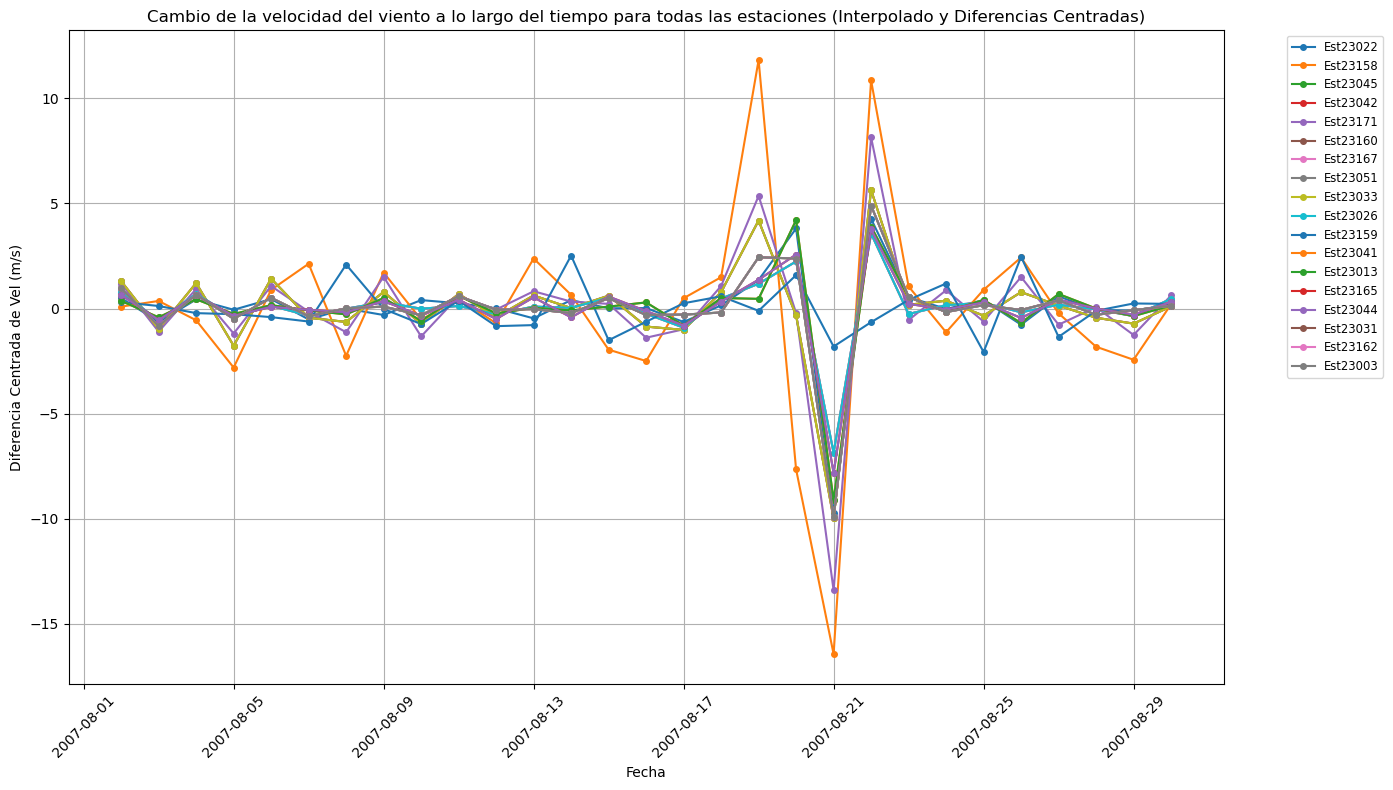

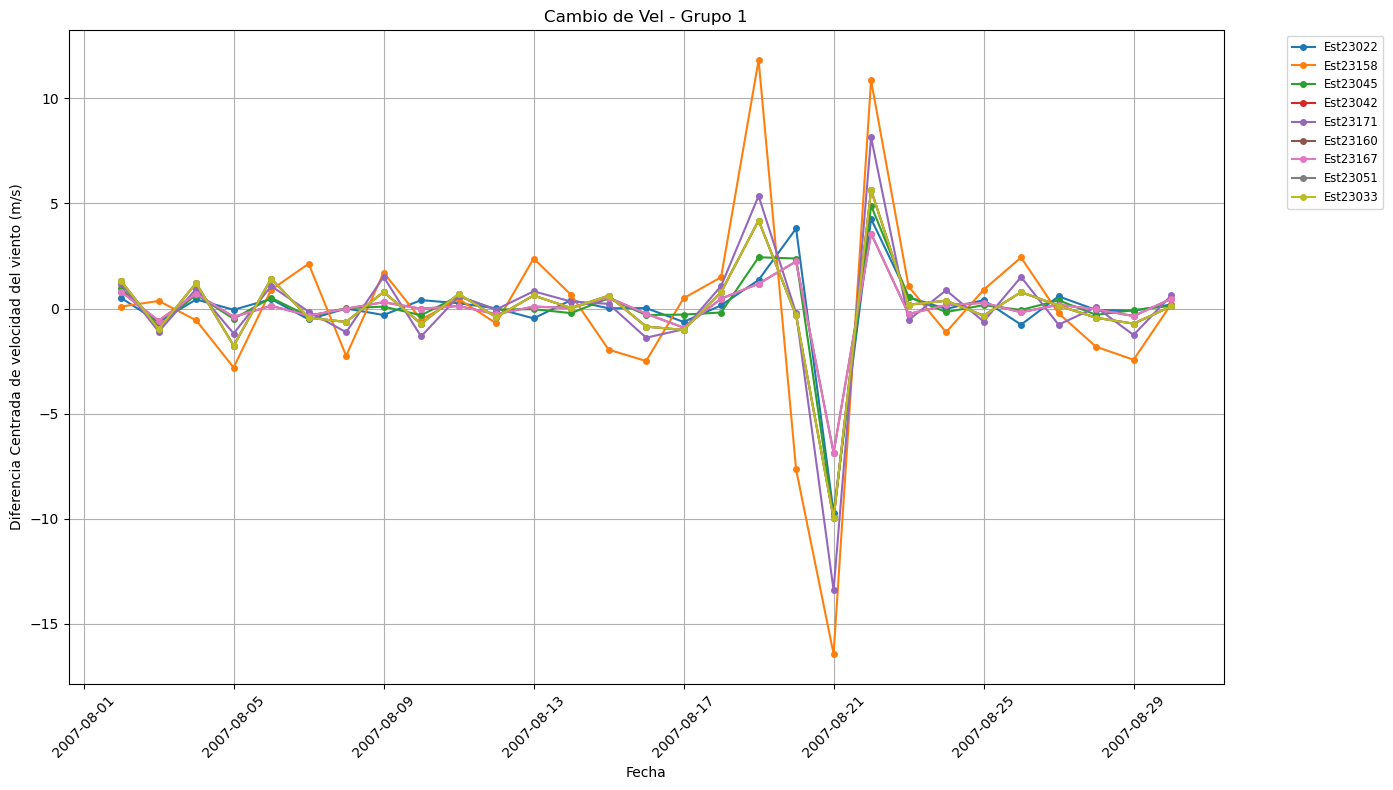

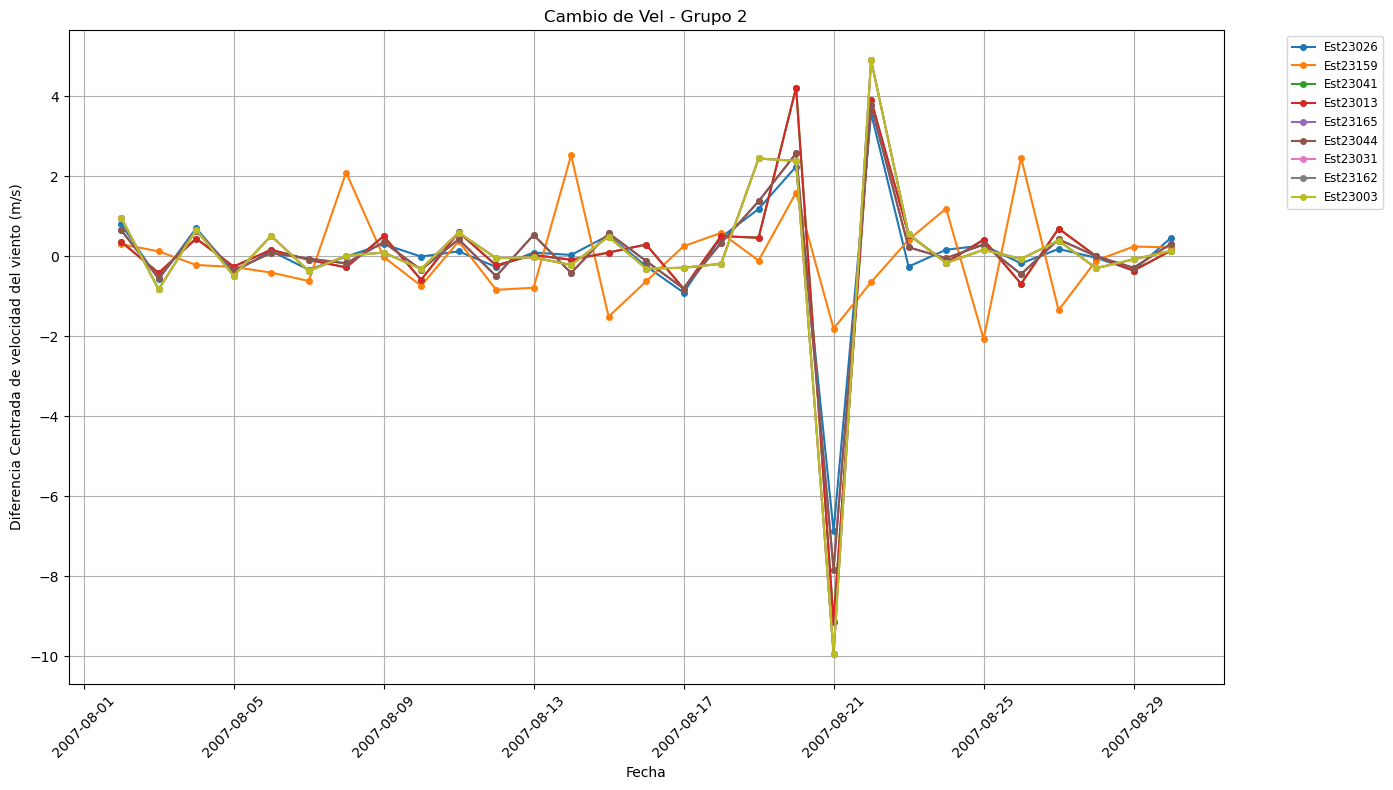

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Información de las estaciones meteorológicas
estaciones_info = {
    'Est23022': {'lon': -88.1378, 'lat': 19.8472, 'archivo': 'Est23022.xlsx'},
    'Est23158': {'lon': -87.7139, 'lat': 18.7058, 'archivo': 'Est23158.xlsx'},
    'Est23045': {'lon': -88.05, 'lat': 19.5667, 'archivo': 'Est23045.xlsx'},
    'Est23042': {'lon': -88.1108, 'lat': 19.0219, 'archivo': 'Est23042.xlsx'},
    'Est23171': {'lon': -88.2578, 'lat': 18.7036, 'archivo': 'Est23171.xlsx'},
    'Est23160': {'lon': -88.5728, 'lat': 18.8131, 'archivo': 'Est23160.xlsx'},
    'Est23167': {'lon': -88.8333, 'lat': 19.0083, 'archivo': 'Est23167.xlsx'},
    'Est23051': {'lon': -88.1644, 'lat': 18.9547, 'archivo': 'Est23051.xlsx'},
    'Est23033': {'lon': -88.2133, 'lat': 18.9789, 'archivo': 'Est23033.xlsx'},
    'Est23026': {'lon': -88.5239, 'lat': 19.1889, 'archivo': 'Est23026.xlsx'},
    'Est23159': {'lon': -88.9575, 'lat': 19.7378, 'archivo': 'Est23159.xlsx'},
    'Est23041': {'lon': -88.8119, 'lat': 19.9011, 'archivo': 'Est23041.xlsx'},
    'Est23013': {'lon': -88.7544, 'lat': 19.8022, 'archivo': 'Est23013.xlsx'},
    'Est23165': {'lon': -88.7097, 'lat': 19.7389, 'archivo': 'Est23165.xlsx'},
    'Est23044': {'lon': -88.6875, 'lat': 19.6331, 'archivo': 'Est23044.xlsx'},
    'Est23031': {'lon': -88.3764, 'lat': 19.6944, 'archivo': 'Est23031.xlsx'},
    'Est23162': {'lon': -88.3978, 'lat': 19.5014, 'archivo': 'Est23162.xlsx'},
    'Est23003': {'lon': -88.045, 'lat': 19.5756, 'archivo': 'Est23003.xlsx'}
}


# Cargar y combinar datos de todas las estaciones
df_combinado = pd.DataFrame()
for estacion, info in estaciones_info.items():
    df = pd.read_excel(info['archivo'])
    df.replace("NULO", np.nan, inplace=True)
    df['Latitud'] = info['lat']
    df['Longitud'] = info['lon']
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['Vel'] = pd.to_numeric(df['Vel'], errors='coerce')
    df['Estacion'] = estacion  # Añadir identificador de estación
    df_combinado = pd.concat([df_combinado, df], ignore_index=True)

# Asegurarse de que los datos estén ordenados por fecha y estación
df_combinado.sort_values(by=['Fecha', 'Estacion'], inplace=True)

# Interpolar valores NaN en Vel para cada estación
df_combinado['Vel'] = df_combinado.groupby('Estacion')['Vel'].transform(lambda x: x.interpolate())

# Ahora, calcular diferencias finitas centradas para Vel a lo largo del tiempo para cada estación
df_combinado['DVel_Centrada'] = df_combinado.groupby('Estacion')['Vel'].transform(lambda x: x.diff().shift(-1) - x.diff())

# Visualización de la diferencia centrada de Vel a lo largo del tiempo para todas las estaciones
plt.figure(figsize=(14, 8))

for estacion in estaciones_info.keys():
    df_estacion = df_combinado[df_combinado['Estacion'] == estacion]
    plt.plot(df_estacion['Fecha'], df_estacion['DVel_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4)

plt.title('Cambio de la velocidad del viento a lo largo del tiempo para todas las estaciones (Interpolado y Diferencias Centradas)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Centrada de Vel (m/s)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dividir las estaciones en dos grupos
estaciones_lista = list(estaciones_info.keys())
mitad = len(estaciones_lista) // 2  # Encuentra el punto medio de la lista
estaciones_grupo_1 = estaciones_lista[:mitad]
estaciones_grupo_2 = estaciones_lista[mitad:]

# Función para graficar un grupo de estaciones
def graficar_grupo_estaciones(estaciones, df, titulo):
    plt.figure(figsize=(14, 8))
    for estacion in estaciones:
        df_estacion = df[df['Estacion'] == estacion]
        plt.plot(df_estacion['Fecha'], df_estacion['DVel_Centrada'], label=estacion, marker='o', linestyle='-', markersize=4)
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Diferencia Centrada de velocidad del viento (m/s)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar los dos grupos de estaciones
graficar_grupo_estaciones(estaciones_grupo_1, df_combinado, 'Cambio de Vel - Grupo 1')
graficar_grupo_estaciones(estaciones_grupo_2, df_combinado, 'Cambio de Vel - Grupo 2')
